<a href="https://colab.research.google.com/github/MasterBeard/Image-Augmentation/blob/main/Smart_Ship_Greedy_vs_Brute_Force.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# 文件路径
file_path = '/content/drive/My Drive/df_final_red_sum_abs.csv'

# 读取数据，排除指定的列
df = pd.read_csv(file_path, usecols=lambda column: not column.startswith('Unnamed'))

In [ ]:
df

,Submission ID,Submission ID generated by device,Transfers Date,Vessel,Transfers : Time Question,Transfers : Hour,Transfers : To/From where?,Transfers : Turbine,Transfers : No. of Pax,Transfers : Transfer Up/Down,...,Lon,datetime,distance,Distance_abs,Total fuel used L,VHM0 (Wave Height),Eastward Wind,Northward Wind,Eastward Current,Northward Current
0,65260610,9c431365-fab7-46c7-a427-a62705a7129e,06/12/2021,Njord Forseti,06:55:00,6.0,Shore,Lowestoft,9,Down (On to CTV),...,1.736557,06/12/2021 06:55,0.000000,NaN,0.000000,NaN,1.69,3.57,-0.097,-0.629
1,65260610,9c431365-fab7-46c7-a427-a62705a7129e,06/12/2021,Njord Forseti,08:20:00,8.0,Tp/Substation,EA1 C13,3,Up (Leaving CTV),...,2.486233,06/12/2021 08:20,31.875482,31.267991,673.887565,1.304,0.95,8.94,-0.065,-0.305
2,65260610,9c431365-fab7-46c7-a427-a62705a7129e,06/12/2021,Njord Forseti,08:52:00,8.0,Tp/Substation,EA1 E23,3,Up (Leaving CTV),...,2.511583,06/12/2021 08:52,3.370985,4.346855,198.464028,1.306,2.59,9.98,-0.121,-0.839
3,65260610,9c431365-fab7-46c7-a427-a62705a7129e,06/12/2021,Njord Forseti,09:30:00,9.0,Tp/Substation,EA1 B14,2,Up (Leaving CTV),...,2.452900,06/12/2021 09:30,5.214121,4.614607,242.297393,1.306,3.20,10.45,-0.262,-0.975
4,65260610,9c431365-fab7-46c7-a427-a62705a7129e,06/12/2021,Njord Forseti,09:50:00,9.0,Tp/Substation,EA1 B14,2,Down (On to CTV),...,2.452900,06/12/2021 09:50,0.735821,0.000000,50.687417,1.306,3.20,10.45,-0.262,-0.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6942,98619423,218422c3-e4e0-4d77-b7fb-ea9ca0ad6cf6,15/11/2024,Njord Forseti,16:15:00,16.0,Shore,Lowestoft,8,Up (Leaving CTV),...,1.736557,15/11/2024 16:15,31.709232,31.016346,666.069552,NaN,-5.20,-1.50,-0.029,-0.574
6943,98643083,699994a0-9753-415a-b149-c238301d1e5d,16/11/2024,Njord Forseti,07:15:00,6.0,Shore,Lowestoft,6,Down (On to CTV),...,1.736557,16/11/2024 07:15,0.000000,0.000000,0.000000,NaN,-5.20,-1.50,-0.029,-0.574
6944,98643083,699994a0-9753-415a-b149-c238301d1e5d,16/11/2024,Njord Forseti,08:45:00,8.0,Tp/Substation,EA1 D13,3,Up (Leaving CTV),...,2.516367,16/11/2024 08:45,32.792006,32.164059,626.470742,0.824,-6.68,-0.56,-0.214,-0.690
6945,98643083,699994a0-9753-415a-b149-c238301d1e5d,16/11/2024,Njord Forseti,14:20:00,14.0,Tp/Substation,EA1 D13,3,Up (Leaving CTV),...,2.516367,16/11/2024 14:20,20.935782,0.000000,424.667413,0.824,-6.68,-0.56,-0.214,-0.690


In [ ]:
import pandas as pd
import math

# Haversine function
def haversine(lat1, lon1, lat2, lon2):
    R = 6371000  # 地球半径（米）
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance_meters = R * c
    return distance_meters / 1852  # 转换为海里

# 示例 df_start 和 df_nodes（假设已经有数据）
df_start = df.loc[df['Transfers : To/From where?'] == 'Shore', ['Transfers : Turbine','Lat', 'Lon']].drop_duplicates()
df_nodes = df.loc[df['Transfers : To/From where?'] != 'Shore', ['Transfers : Turbine','Lat', 'Lon']].drop_duplicates()

# 计算距离
results = []
for _, start_row in df_start.iterrows():
    for _, node_row in df_nodes.iterrows():
        distance = haversine(start_row['Lat'], start_row['Lon'], node_row['Lat'], node_row['Lon'])
        results.append({
            'Start Turbine': start_row['Transfers : Turbine'],
            'Node Turbine': node_row['Transfers : Turbine'],
            'Distance (Nautical Miles)': distance
        })

# 转换为 DataFrame
df_distances = pd.DataFrame(results)

# 显示结果
df_distances.head()

,Start Turbine,Node Turbine,Distance (Nautical Miles)
0,Lowestoft,EA1 C13,31.267991
1,Lowestoft,EA1 E23,30.330733
2,Lowestoft,EA1 B14,30.116403
3,Lowestoft,EA1 C17,30.109118
4,Lowestoft,EA1 C16,30.370893


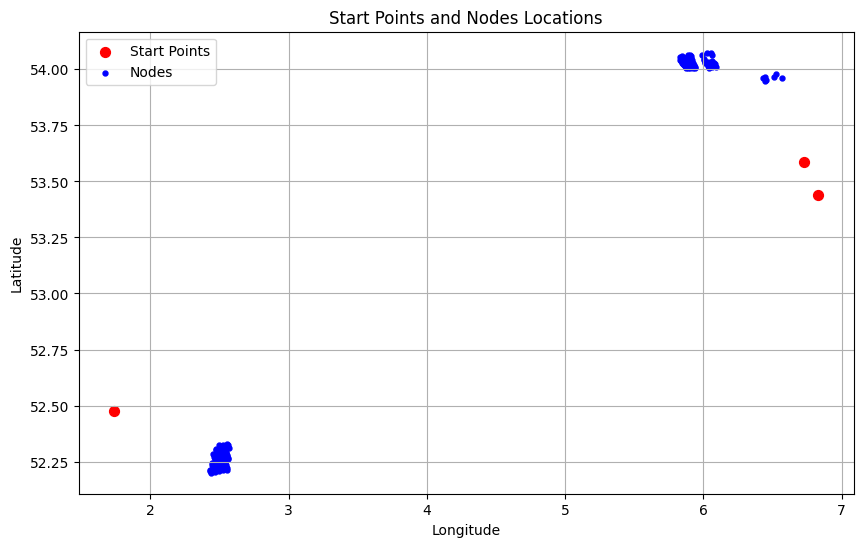

,Start Turbine,Node Turbine,Distance (Nautical Miles)
0,Lowestoft,EA1 C13,31.267991
1,Lowestoft,EA1 E23,30.330733
2,Lowestoft,EA1 B14,30.116403
3,Lowestoft,EA1 C17,30.109118
4,Lowestoft,EA1 C16,30.370893


In [ ]:
import matplotlib.pyplot as plt
# 转换为 DataFrame
df_distances = pd.DataFrame(results)

# 绘制图像
plt.figure(figsize=(10, 6))
plt.scatter(df_start['Lon'], df_start['Lat'], color='red', label='Start Points', marker='o', s=50)
plt.scatter(df_nodes['Lon'], df_nodes['Lat'], color='blue', label='Nodes', marker='.', s=50)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Start Points and Nodes Locations')
plt.legend()
plt.grid(True)
plt.show()

# 显示结果
df_distances.head()

# Greedy Algorithm

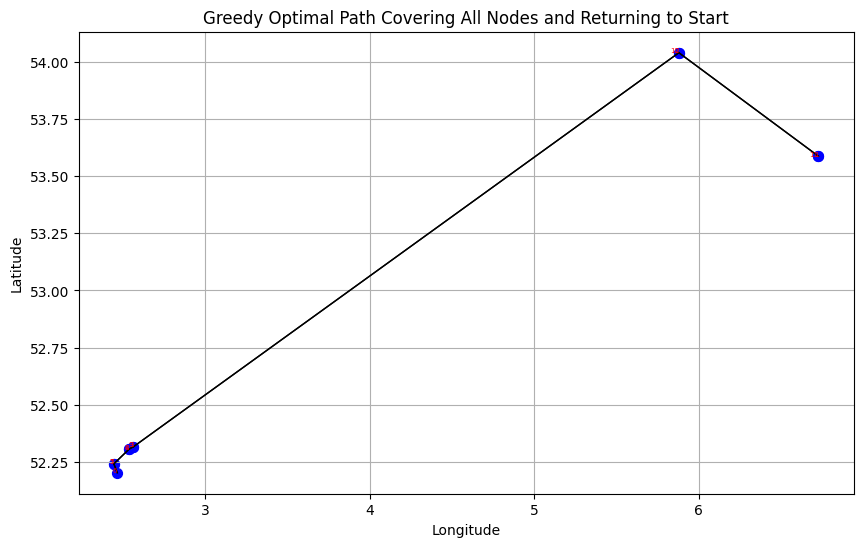

Optimal Route1: [('Borkum', 53.5872, 6.7267), ('Gemini ZEC2', 54.03980824, 5.878752378), ('EA1 G25', 52.31661667, 2.564916667), ('EA1 F24', 52.30608333, 2.538183333), ('EA1 B16', 52.24171667, 2.445933333), ('EA1 B10', 52.20291667, 2.4666), ('EA1 B16', 52.24171667, 2.445933333), ('EA1 F24', 52.30608333, 2.538183333), ('EA1 G25', 52.31661667, 2.564916667), ('Gemini ZEC2', 54.03980824, 5.878752378), ('Borkum', 53.5872, 6.7267)]
Total Distance (nautical miles): 414.24283759687125
Optimal Route2: [('Borkum', 53.5872, 6.7267), ('Gemini ZEC2', 54.03980824, 5.878752378), ('EA1 G25', 52.31661667, 2.564916667), ('EA1 F24', 52.30608333, 2.538183333), ('EA1 B16', 52.24171667, 2.445933333), ('EA1 B10', 52.20291667, 2.4666), ('EA1 B16', 52.24171667, 2.445933333), ('EA1 F24', 52.30608333, 2.538183333), ('EA1 G25', 52.31661667, 2.564916667), ('Gemini ZEC2', 54.03980824, 5.878752378), ('Borkum', 53.5872, 6.7267)]
Total Distance (nautical miles): 414.24283759687125
Optimal Route3: [('Borkum', 53.5872, 6

In [ ]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import random

def haversine(lat1, lon1, lat2, lon2):
    R = 6371000  # 地球半径（米）
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance_meters = R * c
    return distance_meters / 1852  # 转换为海里

# 示例 df_start 和 df_nodes
df_start = df.loc[df['Transfers : To/From where?'] == 'Shore', ['Transfers : Turbine','Lat', 'Lon']].drop_duplicates()
df_nodes = df.loc[df['Transfers : To/From where?'] != 'Shore', ['Transfers : Turbine','Lat', 'Lon']].drop_duplicates()

# 选择起点
start_point = df_start.sample(1).iloc[0]
nodes_list = df_nodes.sample(5).to_dict('records')
visited = [start_point.to_dict()]
remaining = nodes_list[:]

# 贪心算法找最短路径
while remaining:
    current = visited[-1]
    nearest = min(remaining, key=lambda node: haversine(current['Lat'], current['Lon'], node['Lat'], node['Lon']))
    visited.append(nearest)
    remaining.remove(nearest)

remaining = visited[:-1]
visited1 = visited+remaining[::-1]
remaining = visited[1:-1]
visited2 = [visited[-1]]
# 返程：从最后一个节点回溯到起点
while remaining:
    current = visited[-1]
    previous = min(remaining, key=lambda node: haversine(current['Lat'], current['Lon'], node['Lat'], node['Lon']))
    visited.append(previous)
    visited2.append(previous)
    remaining.remove(previous)

visited.append(start_point.to_dict())
visited2.append(start_point.to_dict())
visited2 = visited2[::-1]+ visited2[1:]
# 画图
plt.figure(figsize=(10, 6))
for idx, node in enumerate(visited):
    plt.scatter(node['Lon'], node['Lat'], color='blue', marker='o', s=50)
    plt.text(node['Lon'], node['Lat'], str(idx+1), fontsize=5, ha='right', color='red')
for i in range(len(visited)-1):
    plt.plot([visited[i]['Lon'], visited[i+1]['Lon']], [visited[i]['Lat'], visited[i+1]['Lat']], 'k-', linewidth=1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Greedy Optimal Path Covering All Nodes and Returning to Start')
plt.grid(True)
plt.show()

# 计算路径总距离
total_distance = sum(haversine(visited[i]['Lat'], visited[i]['Lon'], visited[i+1]['Lat'], visited[i+1]['Lon']) for i in range(len(visited)-1))
total_distance1 = sum(haversine(visited1[i]['Lat'], visited1[i]['Lon'], visited1[i+1]['Lat'], visited1[i+1]['Lon']) for i in range(len(visited1)-1))
total_distance2 = sum(haversine(visited2[i]['Lat'], visited2[i]['Lon'], visited2[i+1]['Lat'], visited2[i+1]['Lon']) for i in range(len(visited2)-1))
# 显示最优路径
formatted_best_route = [(node['Transfers : Turbine'], node['Lat'], node['Lon']) for node in visited]
print("Optimal Route1:", formatted_best_route)
print("Total Distance (nautical miles):", total_distance)
formatted_best_route1 = [(node['Transfers : Turbine'], node['Lat'], node['Lon']) for node in visited1]
print("Optimal Route2:", formatted_best_route1)
print("Total Distance (nautical miles):", total_distance1)
formatted_best_route2 = [(node['Transfers : Turbine'], node['Lat'], node['Lon']) for node in visited2]
print("Optimal Route3:", formatted_best_route2)
print("Total Distance (nautical miles):", total_distance2)

# Brute Force Approach

120


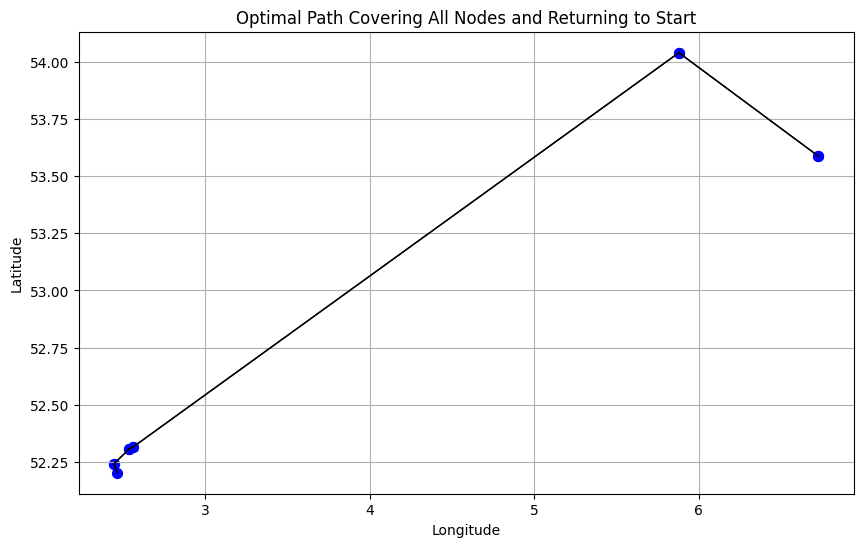

Optimal Route: [('Borkum', 53.5872, 6.7267), ('Gemini ZEC2', 54.03980824, 5.878752378), ('EA1 G25', 52.31661667, 2.564916667), ('EA1 F24', 52.30608333, 2.538183333), ('EA1 B16', 52.24171667, 2.445933333), ('EA1 B10', 52.20291667, 2.4666), ('EA1 B16', 52.24171667, 2.445933333), ('EA1 F24', 52.30608333, 2.538183333), ('EA1 G25', 52.31661667, 2.564916667), ('Gemini ZEC2', 54.03980824, 5.878752378), ('Borkum', 53.5872, 6.7267)]
Total Distance (nautical miles): 414.24283759687125


In [ ]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import random
import networkx as nx
from itertools import permutations

# Haversine function
def haversine(lat1, lon1, lat2, lon2):
    R = 6371000  # 地球半径（米）
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance_meters = R * c
    return distance_meters / 1852  # 转换为海里

# 示例 df_start 和 df_nodes
df_start = df.loc[df['Transfers : To/From where?'] == 'Shore', ['Transfers : Turbine','Lat', 'Lon']].drop_duplicates()
df_nodes = df.loc[df['Transfers : To/From where?'] != 'Shore', ['Transfers : Turbine','Lat', 'Lon']].drop_duplicates()


# 计算完整路径的最短路径
all_nodes = [start_point.to_dict()] + nodes_list
permutations_list = permutations(nodes_list)


print(len(list(permutations(nodes_list))))
min_distance = float('inf')

best_route = None

for perm in permutations_list:
    route = [start_point.to_dict()] + list(perm) + list(perm)[::-1][1:] + [start_point.to_dict()]
    distance = sum(haversine(route[i]['Lat'], route[i]['Lon'], route[i+1]['Lat'], route[i+1]['Lon']) for i in range(len(route)-1))
    if distance < min_distance:
        min_distance = distance
        best_route = route

# 绘制图像
plt.figure(figsize=(10, 6))

# 画点
for node in best_route:
    plt.scatter(node['Lon'], node['Lat'], color='blue', marker='o', s=50)
    #plt.text(node['Lon'], node['Lat'], node['Transfers : Turbine'], fontsize=9, ha='right')

# 画路径
for i in range(len(best_route)-1):
    plt.plot([best_route[i]['Lon'], best_route[i+1]['Lon']], [best_route[i]['Lat'], best_route[i+1]['Lat']], 'k-', linewidth=1)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Optimal Path Covering All Nodes and Returning to Start')
plt.grid(True)
plt.show()

# 计算路径总距离
total_distance = sum(haversine(best_route[i]['Lat'], best_route[i]['Lon'], best_route[i+1]['Lat'], best_route[i+1]['Lon']) for i in range(len(best_route)-1))

# 显示最优路径
formatted_best_route = [(node['Transfers : Turbine'], node['Lat'], node['Lon']) for node in best_route]
print("Optimal Route:", formatted_best_route)
print("Total Distance (nautical miles):", total_distance)